In [1]:
#!pip install numpy            # Cài đặt thư viện NumPy - hỗ trợ tính toán mảng và ma trận hiệu quả
#!pip install pandas           # Cài đặt thư viện Pandas - dùng để xử lý và phân tích dữ liệu dạng bảng (DataFrame)
#!pip install contractions     # Cài đặt thư viện contractions - dùng để mở rộng các từ viết tắt trong văn bản (vd: don't → do not)
#!pip install tqdm             # Cài đặt thư viện tqdm - giúp hiển thị thanh tiến trình khi chạy vòng lặp
#!pip install seaborn          # Cài đặt thư viện Seaborn - thư viện vẽ biểu đồ dựa trên matplotlib, đẹp và dễ dùng
#!pip install matplotlib       # Cài đặt thư viện Matplotlib - thư viện vẽ biểu đồ cơ bản và phổ biến trong Python
#!pip install transformers     # Cài đặt thư viện Transformers - dùng các mô hình NLP hiện đại như BERT, GPT, T5, v.v.


In [2]:
import numpy as np                  # Thư viện hỗ trợ tính toán số học, mảng, ma trận
import pandas as pd                # Thư viện xử lý dữ liệu dạng bảng (DataFrame)

import re                          # Thư viện xử lý biểu thức chính quy (regular expressions)
import string                      # Thư viện chứa các hằng số chuỗi như string.punctuation (dấu câu)
import contractions                # Dùng để mở rộng các từ viết tắt (vd: I'm → I am)

from tqdm import tqdm              # Thư viện hiển thị thanh tiến trình trong vòng lặp
tqdm.pandas(desc="Progress Bar")   # Tích hợp tqdm với pandas để theo dõi tiến trình khi dùng .progress_apply()

import seaborn as sns              # Thư viện vẽ biểu đồ đẹp và dễ hiểu, dựa trên matplotlib
import matplotlib.pyplot as plt    # Thư viện vẽ biểu đồ cơ bản

import torch                       # Thư viện PyTorch - dùng để xử lý tensor và mô hình học sâu (deep learning)
from transformers import DistilBertTokenizer, DistilBertModel
# Import tokenizer và mô hình DistilBERT từ thư viện transformers (dùng cho NLP)

from sklearn.metrics.pairwise import cosine_similarity
# Hàm tính độ tương đồng cosine giữa các vector đặc trưng (feature vectors)



In [3]:
df = pd.read_csv('pdf_extracted_skills_education.csv')  # Đọc file CSV và lưu vào DataFrame có tên là df

df.head()  # Hiển thị 5 dòng đầu tiên của DataFrame để xem sơ bộ nội dung dữ liệu


,Skills,Education,ID,Category
0,Accounting; General Accounting; Accounts Payab...,Northern Maine Community College 1994 Associat...,10554236,ACCOUNTANT
1,"accounting, accounts payable, Accounts Receiva...","Bachelor of Science : Accounting , May 2010 Un...",10674770,ACCOUNTANT
2,"accounts payables, accounts receivables, Accou...",Computer Applications Specialist Certificate P...,11163645,ACCOUNTANT
3,"accounting, balance sheet, budgets, client, cl...","EMORY UNIVERSITY, Goizueta Business School 5 2...",11759079,ACCOUNTANT
4,Aderant/CMS Financial reporting,Bachelor of Business Administration : Accounti...,12065211,ACCOUNTANT


In [4]:
# Chúng ta có 2484 hồ sơ xin việc
df.shape

(2484, 4)

Phân tích giá trị Null

In [6]:

# Null values
df.isna().sum()

# Có vẻ như Giáo dục không được trích xuất đúng cách

Skills        91
Education    590
ID             0
Category       0
dtype: int64

In [7]:
# Chúng ta có 15 Sơ yếu lý lịch không trích xuất Kỹ năng & Giáo dục
# Vậy, hãy xóa chúng

print(df[(df.Skills.isna() & df.Education.isna())])

     Skills Education        ID                Category
145     NaN       NaN  17021141                ADVOCATE
367     NaN       NaN  31225895                 APPAREL
407     NaN       NaN  14248724                    ARTS
802     NaN       NaN  12632728    BUSINESS-DEVELOPMENT
1047    NaN       NaN  14849103            CONSTRUCTION
1270    NaN       NaN  14014749                DESIGNER
1357    NaN       NaN  90066849                DESIGNER
1492    NaN       NaN  20566550             ENGINEERING
1723    NaN       NaN  17576030                 FITNESS
1738    NaN       NaN  21178545                 FITNESS
1802    NaN       NaN  77266989                 FITNESS
1829    NaN       NaN  15499825              HEALTHCARE
2078    NaN       NaN  20237244  INFORMATION-TECHNOLOGY
2116    NaN       NaN  29051656  INFORMATION-TECHNOLOGY
2290    NaN       NaN  16280971                   SALES


In [8]:
# Chúng ta còn lại 2469 bản lý lịch sau khi loại bỏ 15 bản lý lịch có dữ liệu null trong cả hai bản lý lịch

print(df[~(df['Skills'].isna() & df['Education'].isna())].shape)

cv_df = df[~(df['Skills'].isna() & df['Education'].isna())].reset_index(drop=True)
cv_df.head()

(2469, 4)


,Skills,Education,ID,Category
0,Accounting; General Accounting; Accounts Payab...,Northern Maine Community College 1994 Associat...,10554236,ACCOUNTANT
1,"accounting, accounts payable, Accounts Receiva...","Bachelor of Science : Accounting , May 2010 Un...",10674770,ACCOUNTANT
2,"accounts payables, accounts receivables, Accou...",Computer Applications Specialist Certificate P...,11163645,ACCOUNTANT
3,"accounting, balance sheet, budgets, client, cl...","EMORY UNIVERSITY, Goizueta Business School 5 2...",11759079,ACCOUNTANT
4,Aderant/CMS Financial reporting,Bachelor of Business Administration : Accounti...,12065211,ACCOUNTANT


In [9]:
# Số lượng giá trị null mới trong Mục Kỹ năng & Giáo dục
cv_df.isna().sum()

Skills        76
Education    575
ID             0
Category       0
dtype: int64

In [10]:

# Giá trị Null trong Phần Kỹ năng
cv_df[cv_df.Skills.isna()]

,Skills,Education,ID,Category
7,NaN,"Bachelor of Science , Accounting Strayer Unive...",12442909,ACCOUNTANT
23,NaN,University of Phoenix Masters of Business Admi...,15363277,ACCOUNTANT
46,NaN,"Masters , Accounting University of Florida ï¼​...",21794875,ACCOUNTANT
76,NaN,High School Diploma : Business Management/Acco...,27637576,ACCOUNTANT
115,NaN,Bachelor of Arts : Economics City College of N...,82649935,ACCOUNTANT
...,...,...,...,...
2242,NaN,Master of Journalism : PR/Integrated Communica...,59346975,PUBLIC-RELATIONS
2245,NaN,B.A : Marketing June 2005 Berkeley College Mar...,75329822,PUBLIC-RELATIONS
2387,NaN,Plans.\nApplied progressive teaching principle...,17481570,TEACHER
2417,NaN,"Ph.D. : Philosophy in Education , 2019\nNorthc...",27126818,TEACHER


In [11]:
# Giá trị Null trong Mục Giáo dục
cv_df[cv_df.Education.isna()]

,Skills,Education,ID,Category
11,Budget forecasting expertise General ledger ac...,NaN,13130984,ACCOUNTANT
13,Full Accounting cycle Auditing,NaN,13491889,ACCOUNTANT
20,"account reconciliations, Accounting, accruals,...",NaN,14491649,ACCOUNTANT
29,"Accounting, billing, Change Management, contra...",NaN,17407184,ACCOUNTANT
31,Analytical reasoning Effective time management,NaN,18132924,ACCOUNTANT
...,...,...,...,...
2442,"Anatomy, Arts, EMR software, front office, inj...",NaN,37402097,TEACHER
2446,Behavior modeling Troubleshooting,NaN,45987048,TEACHER
2453,"Computer literate, drivers, listening, natural...",NaN,58708773,TEACHER
2458,â€¢ Well versed with the standards of hygiene ...,NaN,69005326,TEACHER


Phân phối các bản lý lịch khác nhau

In [13]:
cv_df.Category.value_counts()


Category
BUSINESS-DEVELOPMENT      119
ACCOUNTANT                118
INFORMATION-TECHNOLOGY    118
FINANCE                   118
CHEF                      118
ENGINEERING               117
AVIATION                  117
ADVOCATE                  117
SALES                     115
CONSULTANT                115
BANKING                   115
FITNESS                   114
HEALTHCARE                114
CONSTRUCTION              111
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  105
ARTS                      102
TEACHER                   102
DIGITAL-MEDIA              96
APPAREL                    96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

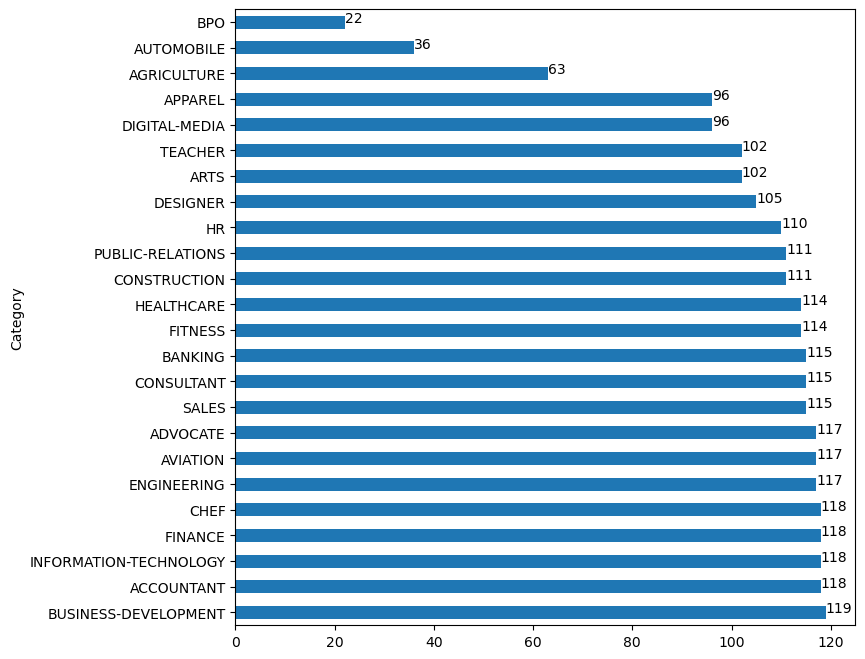

In [14]:
# Chúng ta có thể thấy ở đây sự phân bố của các loại CV khác nhau

plt.figure(figsize=(8,8))  # Tạo một khung hình có kích thước 8x8 inch

cv_df.Category.value_counts().plot(kind='barh')  # Đếm số lượng từng loại Category và vẽ biểu đồ thanh ngang (horizontal bar)

for index, value in enumerate(cv_df.Category.value_counts().values):  
    plt.text(value, index, str(value))  # Hiển thị số lượng tương ứng bên cạnh từng thanh trên biểu đồ

plt.show();  # Hiển thị biểu đồ


Thực hiện một số thao tác dọn dẹp văn bản cơ bản và xem một số số liệu thống kê văn bản

In [16]:
def text_cleaning(text:str) -> str:
    if pd.isnull(text):              # Nếu giá trị 'text' là NaN (rỗng), trả về None
        return

    # lower-case everything
    text = text.lower().strip()      # Chuyển toàn bộ văn bản thành chữ thường và xóa khoảng trắng đầu/cuối

    # For removing puctuations
    translator = str.maketrans('', '', string.punctuation)  # Tạo bảng ánh xạ để loại bỏ dấu câu

    # expand all the short-form words
    text = contractions.fix(text)    # Mở rộng từ viết tắt (vd: can't → cannot)

    # remove any special chars
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)         # Xóa các URL
    text = re.sub(r'\S+@\S+', '', text)                         # Xóa địa chỉ email
    text = re.sub(r'\b\d{1,3}[-./]?\d{1,3}[-./]?\d{1,4}\b', '', text)  # Xóa số điện thoại

    text = text.translate(translator)           # Xóa dấu câu
    text = re.sub(r'[^a-zA-Z]', ' ', text)      # Xóa các ký tự không phải chữ cái, thay bằng khoảng trắng

    return text.strip()             # Trả về văn bản đã làm sạch, loại bỏ khoảng trắng thừa ở đầu/cuối


In [17]:
# Chúng ta hãy kết hợp Kỹ năng và Giáo dục, tương tự như trong mô tả công việc.
resume_df = cv_df.copy()  # Tạo một bản sao của DataFrame cv_df để không làm thay đổi dữ liệu gốc

# Điền các giá trị null trong Kỹ năng & Giáo dục bằng Chuỗi rỗng trước khi nối chúng lại
resume_df = resume_df.fillna(value='')  # Thay thế tất cả giá trị NaN bằng chuỗi rỗng ('')

resume_df['CV'] = resume_df['Skills'] + ' ' + resume_df['Education']  # Kết hợp nội dung từ cột Skills và Education thành một cột mới tên 'CV'

resume_df['CV'] = resume_df['CV'].progress_apply(text_cleaning)  # Áp dụng hàm text_cleaning lên từng dòng trong cột 'CV' với thanh tiến trình hiển thị


Progress Bar: 100%|██████████| 2469/2469 [00:00<00:00, 5017.94it/s]


In [18]:
cv_df.shape  # Trả về tuple (số hàng, số cột) của DataFrame cv_df — tức là kích thước của bảng dữ liệu

(2469, 4)

Phân tích độ dài từ trung bình (và theo phần trăm) trong CV theo danh mục của chúng

In [20]:
# trong toàn bộ ngữ liệu có độ dài nhỏ hơn hoặc bằng y trong ngữ liệu văn bản, chúng ta có
category_stats = []  # Khởi tạo danh sách rỗng để lưu thống kê cho từng loại CV (Category)

for category in resume_df['Category'].unique():  # Lặp qua từng giá trị duy nhất trong cột 'Category'
    category_wise_cv = resume_df[resume_df['Category'] == category]['CV']  
    # Lọc các văn bản CV tương ứng với từng loại Category

    stats = category_wise_cv.str.split().str.len().describe(
        percentiles=[0.05, 0.5, 0.8, 0.9, 0.95]
    )  
    # Tính thống kê độ dài văn bản (số lượng từ): count, mean, std, min, max, và các percentiles

    category_stats.append({'Category': category, **stats.to_dict()})  
    # Thêm kết quả thống kê vào danh sách, chuyển Series thành dict và gắn thêm tên Category

stats_df = pd.DataFrame(category_stats)  
# Tạo DataFrame mới từ danh sách thống kê

# Hiển thị DataFrame kết quả
stats_df  # Gồm thông tin độ dài văn bản theo từng nhóm Category (công việc)


,Category,count,mean,std,min,5%,50%,80%,90%,95%,max
0,ACCOUNTANT,118.0,53.762712,77.190372,1.0,3.85,37.5,72.0,92.0,113.95,710.0
1,ADVOCATE,117.0,50.632479,60.125816,2.0,3.00,37.0,69.8,89.4,137.80,532.0
2,AGRICULTURE,63.0,95.619048,160.796649,2.0,6.20,51.0,110.0,153.2,297.80,985.0
3,APPAREL,96.0,50.364583,107.048451,1.0,3.00,34.0,59.0,77.0,102.75,1049.0
4,ARTS,102.0,101.333333,164.892424,1.0,5.05,50.5,106.6,156.6,482.75,893.0
5,AUTOMOBILE,36.0,39.916667,29.792017,0.0,2.50,35.5,64.0,71.0,98.00,115.0
6,AVIATION,117.0,71.871795,112.382777,2.0,3.00,41.0,86.6,147.8,269.80,879.0
7,BANKING,115.0,77.539130,159.677377,3.0,7.00,46.0,79.2,105.6,222.00,1487.0
8,BPO,22.0,53.818182,35.653940,2.0,14.05,48.5,71.2,87.9,121.25,156.0
9,BUSINESS-DEVELOPMENT,119.0,49.126050,37.023253,1.0,3.00,40.0,81.2,103.2,121.40,183.0


C:\Users\25\AppData\Local\Temp\ipykernel_484\3803292444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stats_df, x='Category', y='mean', palette='viridis')


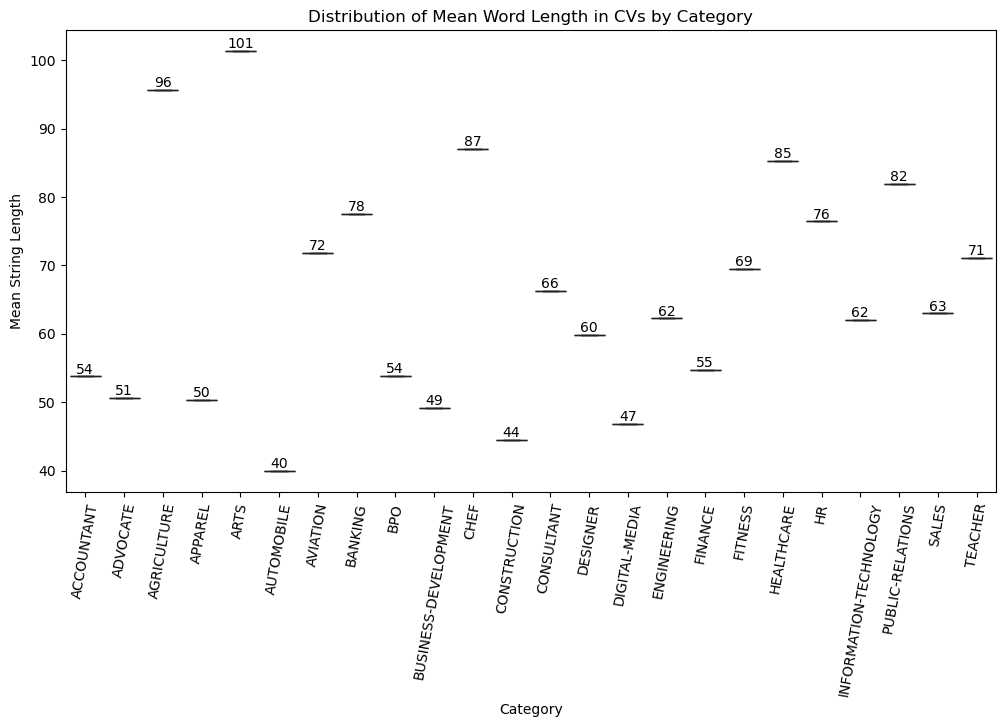

In [21]:
# Tạo biểu đồ hộp để trực quan hóa sự phân bố độ dài chuỗi cho từng danh mục
plt.figure(figsize=(12, 6))  # Thiết lập kích thước biểu đồ là 12x6 inch

sns.boxplot(data=stats_df, x='Category', y='mean', palette='viridis')  
# Vẽ biểu đồ hộp (boxplot) thể hiện phân bố giá trị trung bình độ dài CV theo từng Category
# Dùng bảng màu 'viridis' cho đẹp mắt

# Chú thích các thanh với giá trị thực tế
for index, row in stats_df.iterrows():  
    plt.text(index, row['mean'], f'{round(row["mean"])}', ha='center', va='bottom', fontsize=10)
    # Vẽ số liệu trung bình (đã làm tròn) trên từng cột, căn giữa và căn dưới, cỡ chữ 10

plt.title('Distribution of Mean Word Length in CVs by Category')  # Tiêu đề biểu đồ
plt.xticks(rotation=80)  # Xoay nhãn trục X 80 độ để dễ đọc
plt.xlabel('Category')  # Nhãn trục X
plt.ylabel('Mean String Length')  # Nhãn trục Y
plt.show();  # Hiển thị biểu đồ


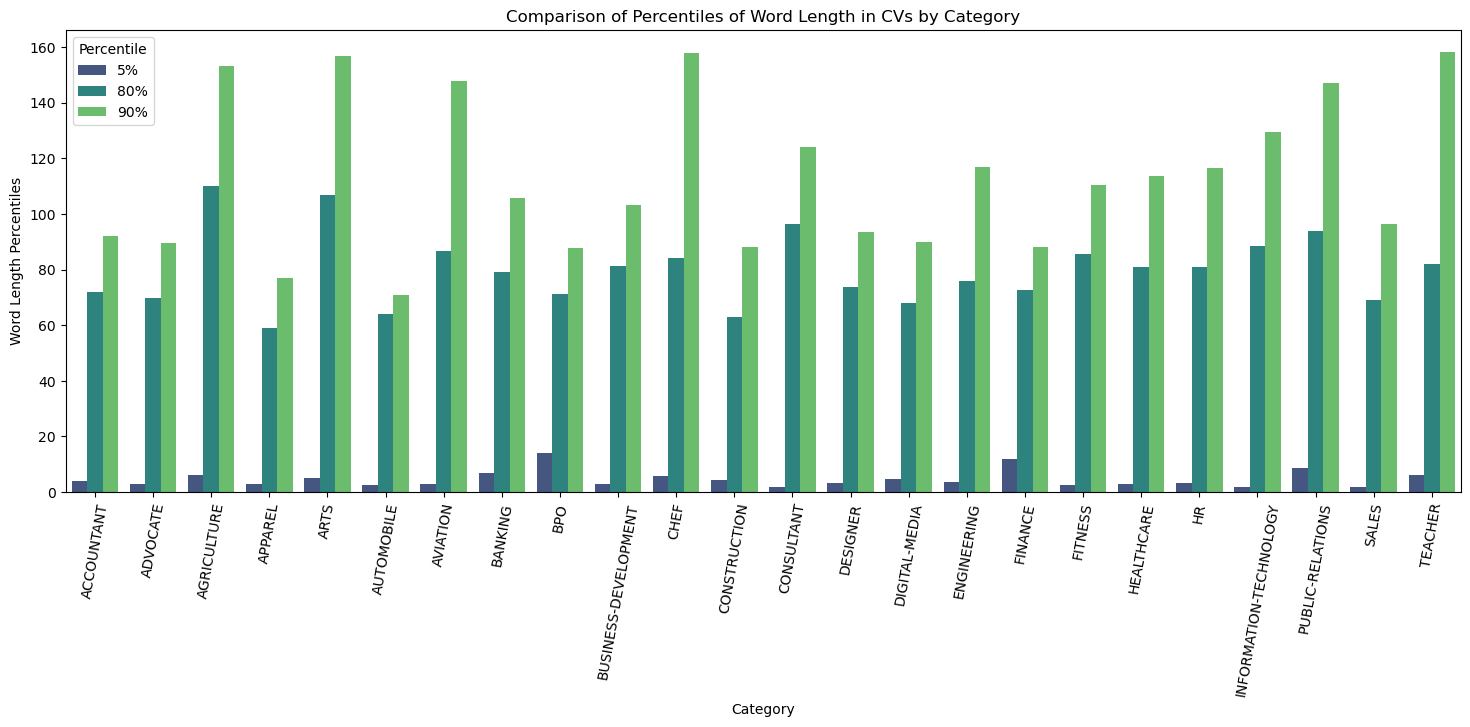

In [22]:
# Định hình lại DataFrame thành định dạng dài để vẽ đồ thị dễ hơn
stats_df_long = pd.melt(
    stats_df,
    id_vars=['Category'],  # Cột giữ nguyên
    value_vars=['5%', '80%', '90%']  # Các cột cần chuyển thành hàng (dài ra)
)
# Kết quả là DataFrame có 3 cột: 'Category', 'variable' (phần trăm), 'value' (giá trị tương ứng)

# Tạo biểu đồ thanh để so sánh các phần trăm độ dài từ cho từng danh mục
plt.figure(figsize=(18, 6))  # Thiết lập kích thước biểu đồ

sns.barplot(
    data=stats_df_long,
    x='Category',
    y='value',
    hue='variable',
    palette='viridis'
)
# Vẽ biểu đồ cột với:
# - Trục X là các danh mục nghề nghiệp (Category)
# - Trục Y là độ dài văn bản ở các percentile (5%, 80%, 90%)
# - Hue (màu phân biệt) theo từng loại phần trăm

plt.title('Comparison of Percentiles of Word Length in CVs by Category')  # Tiêu đề biểu đồ
plt.xticks(rotation=80)  # Xoay nhãn trục X để dễ đọc
plt.xlabel('Category')  # Nhãn trục X
plt.ylabel('Word Length Percentiles')  # Nhãn trục Y
plt.legend(title='Percentile')  # Tiêu đề cho chú thích màu
plt.show();  # Hiển thị biểu đồ


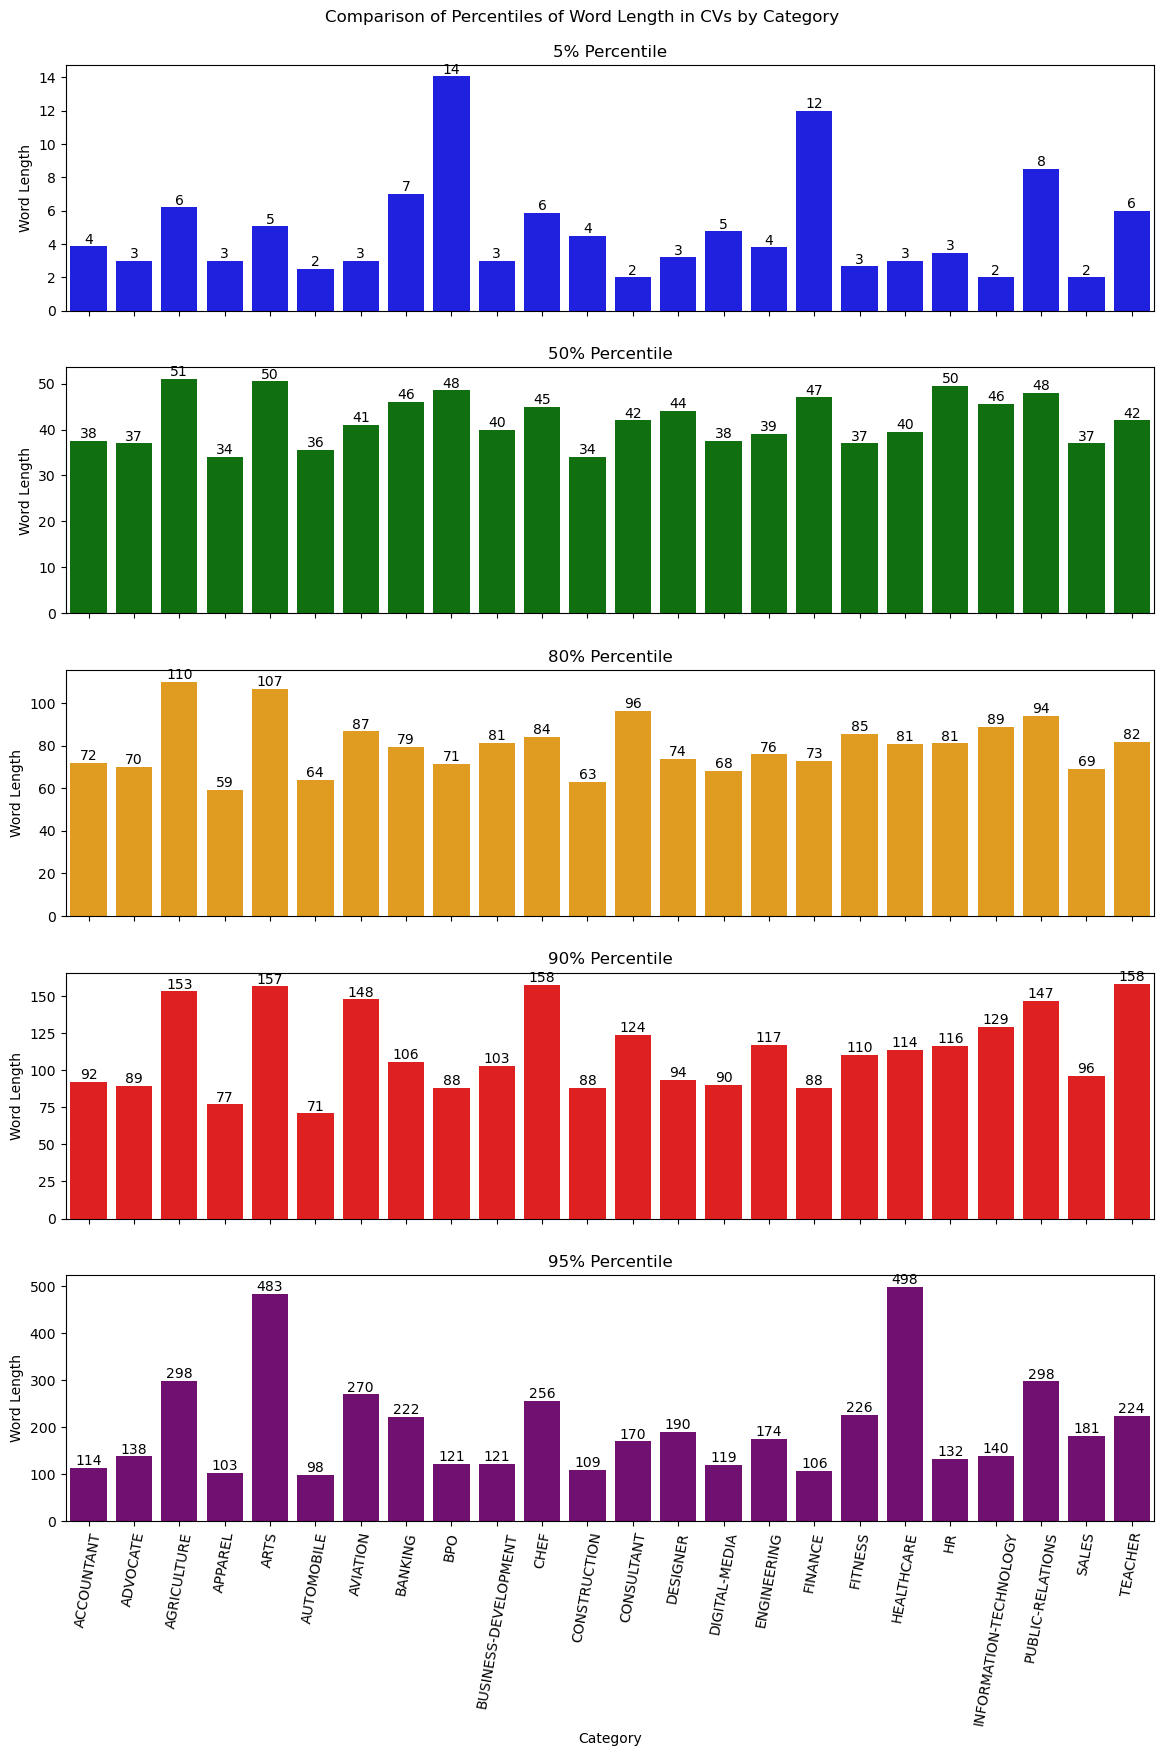

In [23]:
# Tạo một biểu đồ phụ 5x1
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)
# Tạo 5 biểu đồ con (subplots) xếp theo chiều dọc, chia sẻ trục x, với kích thước tổng thể là 12x18 inch

percentiles = ['5%', '50%', '80%', '90%', '95%']  # Danh sách các phần trăm cần vẽ
colors = ['blue', 'green', 'orange', 'red', 'purple']  # Màu sắc cho từng biểu đồ

for i, percentile in enumerate(percentiles):
    # Tạo biểu đồ thanh cho mỗi phần trăm
    sns.barplot(data=stats_df, x='Category', y=percentile, color=colors[i], ax=axes[i])
    # Vẽ biểu đồ thanh tại vị trí subplot tương ứng với percentiles
    
    # Chú thích các thanh với giá trị thực tế
    for index, row in stats_df.iterrows():
        value = row[percentile]
        axes[i].text(index, value, f'{round(value)}', ha='center', va='bottom', fontsize=10)
        # Thêm nhãn số (giá trị làm tròn) phía trên mỗi thanh

    axes[i].set_title(f'{percentile} Percentile')  # Đặt tiêu đề cho từng biểu đồ phụ
    axes[i].set_ylabel('Word Length')  # Gán nhãn trục y

# Đặt nhãn trục x chung và xoay các vạch trục x
plt.xlabel('Category')
plt.xticks(rotation=80)  # Xoay tên các category để tránh bị chồng lên nhau

plt.suptitle('Comparison of Percentiles of Word Length in CVs by Category')  
# Đặt tiêu đề chung cho toàn bộ biểu đồ

# Điều chỉnh khoảng cách giữa các ô phụ
plt.tight_layout(pad=2.0)
# Giúp bố cục không bị chồng chéo, thêm khoảng đệm giữa các biểu đồ phụ

# Show the plots
plt.show();  # Hiển thị toàn bộ biểu đồ


EDA tương tự trên JD Data

In [25]:
# Đọc dữ liệu từ file CSV
jd_data = pd.read_csv("training_data.csv")
jd_df = pd.DataFrame(jd_data)

# Xem 5 dòng đầu tiên
jd_df.head()

,company_name,job_description,position_title,description_length,model_response
0,Google,minimum qualifications\nbachelors degree or eq...,Sales Specialist,2727,"{\n ""Core Responsibilities"": ""Responsible fo..."
1,Apple,description\nas an asc you will be highly infl...,Apple Solutions Consultant,828,"{\n ""Core Responsibilities"": ""as an asc you ..."
2,Netflix,its an amazing time to be joining netflix as w...,Licensing Coordinator - Consumer Products,3205,"{\n ""Core Responsibilities"": ""Help drive bus..."
3,Robert Half,description\n\nweb designers looking to expand...,Web Designer,2489,"{\n ""Core Responsibilities"": ""Designing webs..."
4,TrackFive,at trackfive weve got big goals were on a miss...,Web Developer,3167,"{\n ""Core Responsibilities"": ""Build and layo..."


In [26]:
tqdm.pandas(desc="Cleaning Text")  # Kích hoạt thanh tiến trình khi dùng `.progress_apply`

# Đọc dữ liệu từ file CSV có tên "training_data.csv"
jd_df = pd.read_csv("training_data.csv")

# In ra 5 dòng đầu tiên của DataFrame để kiểm tra dữ liệu
print(jd_df.head())

# Làm sạch cột job_description bằng hàm text_cleaning và hiển thị tiến trình
# (Giả sử bạn đã định nghĩa hàm text_cleaning trước đó)
jd_df['job_description'] = jd_df['job_description'].progress_apply(text_cleaning)



  company_name                                    job_description  \
0       Google  minimum qualifications\nbachelors degree or eq...   
1        Apple  description\nas an asc you will be highly infl...   
2      Netflix  its an amazing time to be joining netflix as w...   
3  Robert Half  description\n\nweb designers looking to expand...   
4    TrackFive  at trackfive weve got big goals were on a miss...   

                              position_title  description_length  \
0                           Sales Specialist                2727   
1                 Apple Solutions Consultant                 828   
2  Licensing Coordinator - Consumer Products                3205   
3                               Web Designer                2489   
4                              Web Developer                3167   

                                      model_response  
0   {\n  "Core Responsibilities": "Responsible fo...  
1   {\n  "Core Responsibilities": "as an asc you ...  
2   {\n  "C

Cleaning Text: 100%|██████████| 853/853 [00:00<00:00, 1096.39it/s]


In [27]:
# Có rất nhiều position_title
jd_df.position_title.unique()

len(jd_df.position_title.unique())

725

In [28]:
# Rất nhiều công ty
jd_df.company_name.unique()

len(jd_df.company_name.unique())

853

So sánh độ dài từ trong JD và CV
Tuy nhiên, số lượng JD (=853) ít hơn so với CV (=2469). Vì vậy, kết quả sẽ bị thiên vị, điều này chỉ nhằm mục đích trực quan hóa.

In [30]:
# Phân tích độ dài từ trung bình (và theo phần trăm) trong mô tả công việc
jd_df['job_description'].str.split().str.len().describe(percentiles=[0.05,0.5,0.8,0.9,0.95])


count     853.000000
mean      482.649472
std       304.695458
min         3.000000
5%         82.200000
50%       441.000000
80%       702.000000
90%       849.800000
95%      1001.000000
max      3581.000000
Name: job_description, dtype: float64

In [31]:
# Phân tích độ dài từ trung bình (và theo phần trăm) trong sơ yếu lý lịch được trích xuất
resume_df['CV'].str.split().str.len().describe(percentiles=[0.05,0.5,0.8,0.9,0.95])

count    2469.000000
mean       66.242608
std       110.373687
min         0.000000
5%          3.000000
50%        42.000000
80%        80.000000
90%       113.000000
95%       176.000000
max      1487.000000
Name: CV, dtype: float64

In [32]:
# Tính số lượng từ trong mỗi mô tả công việc bằng cách tách chuỗi theo khoảng trắng và đếm số từ
jd_word_lengths = jd_df['job_description'].str.split().str.len()

# Tính các thống kê mô tả cho độ dài mô tả công việc (percentiles đã chọn)
# Bỏ qua độ lệch chuẩn, giá trị nhỏ nhất và lớn nhất để tập trung vào các phần trăm
jd_stats = jd_word_lengths.describe(percentiles=[0.05, 0.5, 0.8, 0.9, 0.95]).drop(['std', 'min', 'max'])

# Tương tự như trên, nhưng áp dụng cho dữ liệu CV đã được kết hợp và làm sạch
resume_word_lengths = resume_df['CV'].str.split().str.len()
resume_stats = resume_word_lengths.describe(percentiles=[0.05, 0.5, 0.8, 0.9, 0.95]).drop(['std', 'min', 'max'])

# Tạo DataFrame chứa các thống kê của mô tả công việc
jd_df_stats = pd.DataFrame({
    'Type': 'Job Descriptions',         # Gán nhãn loại dữ liệu là "Job Descriptions"
    'Statistic': jd_stats.index,        # Gồm các chỉ số như mean, 5%, 50%, 80%, v.v.
    'Value': jd_stats.values            # Giá trị thống kê tương ứng
})

# Tạo DataFrame chứa các thống kê của CV
resume_stats_df = pd.DataFrame({
    'Type': 'CVs',                      # Gán nhãn loại dữ liệu là "CVs"
    'Statistic': resume_stats.index,    # Gồm các chỉ số như mean, 5%, 50%, 80%, v.v.
    'Value': resume_stats.values        # Giá trị thống kê tương ứng
})

# Nối hai DataFrame lại với nhau để dễ dàng so sánh và vẽ biểu đồ
comparison_df = pd.concat([jd_df_stats, resume_stats_df], ignore_index=True)

# Hiển thị kết quả thống kê đã kết hợp
comparison_df


,Type,Statistic,Value
0,Job Descriptions,count,853.000000
1,Job Descriptions,mean,482.649472
2,Job Descriptions,5%,82.200000
3,Job Descriptions,50%,441.000000
4,Job Descriptions,80%,702.000000
5,Job Descriptions,90%,849.800000
6,Job Descriptions,95%,1001.000000
7,CVs,count,2469.000000
8,CVs,mean,66.242608
9,CVs,5%,3.000000


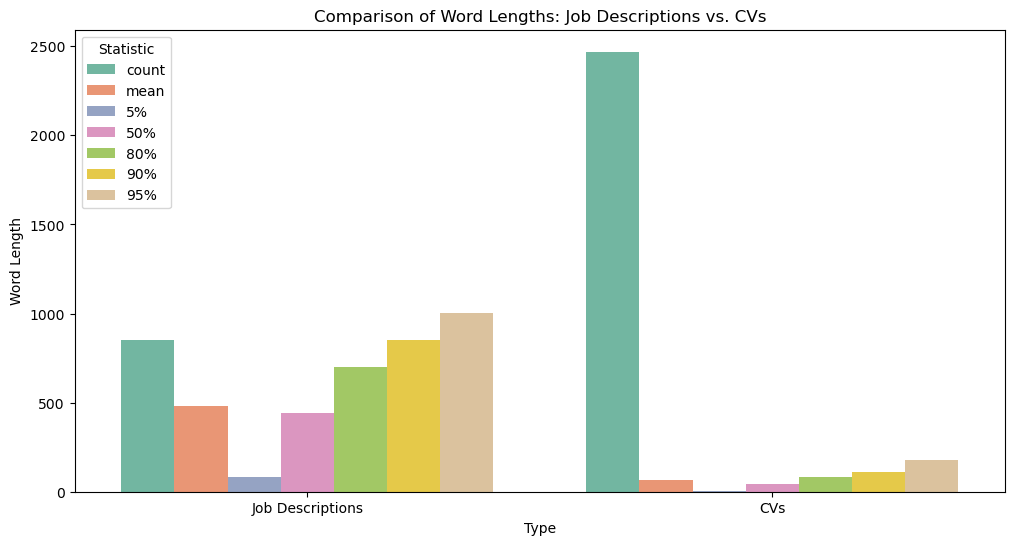

In [33]:
# Tạo biểu đồ hộp để so sánh độ dài của các từ
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x='Type', y='Value', hue='Statistic', palette='Set2')


plt.title('Comparison of Word Lengths: Job Descriptions vs. CVs')
plt.xlabel('Type')
plt.ylabel('Word Length')
plt.legend(title='Statistic', loc='upper left')
plt.xticks(rotation=0)
plt.show();

In [34]:
# Sample JD
print(jd_df['job_description'][0])

minimum qualifications bachelors degree or equivalent practical experience years of experience in saas or productivity tools businessexperience managing enterprise accounts with sales cycles preferred qualifications  years of experience building strategic business partnerships with enterprise customersability to work through and with a reseller ecosystem to scale the businessability to plan pitch and execute a territory business strategyability to build relationships and to deliver results in a crossfunctionalmatrixed environmentability to identify crosspromoting and uppromoting opportunities within the existing account baseexcellent account management writtenverbal communication strategic and analyticalthinking skills about the job as a member of the google cloud team you inspire leading companies schools and government agencies to work smarter with google tools like google workspace search and chrome you advocate the innovative power of our products to make organizations more product

In [35]:
cv_df = df[~(df['Skills'].isna() & df['Education'].isna())].reset_index(drop=True)

# Điền các giá trị null trong Kỹ năng & Giáo dục bằng Chuỗi rỗng trước khi nối chúng lại
cv_df = cv_df.fillna(value='')

# Chúng ta hãy ghép các Kỹ năng và Giáo dục lại với nhau, tương tự như trong mô tả công việc
cv_df['CV'] = cv_df['Skills'] + ' ' + cv_df['Education']

# Làm sạch văn bản
cv_df['CV'] = cv_df['CV'].progress_apply(text_cleaning)

Cleaning Text: 100%|██████████| 2469/2469 [00:00<00:00, 4927.90it/s]


In [36]:
cv_df.shape


(2469, 5)

In [37]:
# Mẫu mô tả công việc
job_descriptions = jd_df['job_description'].apply(text_cleaning)[:15].to_list() # jd_df['job_description'][:15]

# Mẫu sơ yếu lý lịch (thay thế bằng dữ liệu sơ yếu lý lịch đã trích xuất của bạn)
resumes = cv_df['CV'].to_list()

Tạo nhúng bằng DistilBertTokenizer, DistilBertModel

In [39]:
# Tải tokenizer và mô hình DistilBERT đã được huấn luyện sẵn từ HuggingFace
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Tạo danh sách chứa vector embedding của các mô tả công việc
job_description_embeddings = []
for description in job_descriptions:
    # Tokenize chuỗi mô tả công việc (cắt nhỏ văn bản thành token, thêm padding, cắt bớt nếu quá dài)
    tokens = tokenizer(description, padding=True, truncation=True, return_tensors='pt')
    
    # Tắt tính toán gradient để tiết kiệm bộ nhớ (chỉ dùng để suy luận, không huấn luyện)
    with torch.no_grad():
        output = model(**tokens)  # Đưa token vào mô hình để lấy output
    
    # Lấy `last_hidden_state` (ma trận biểu diễn tất cả token), rồi tính trung bình theo chiều token (dim=1)
    embeddings = output.last_hidden_state.mean(dim=1).numpy()
    
    # Thêm vector nhúng 1D vào danh sách (dùng [0] để bỏ chiều batch)
    job_description_embeddings.append(embeddings[0])

# Tạo danh sách chứa vector embedding của các bản lý lịch (resumes)
resume_embeddings = []
for resume in resumes:
    # Tokenize nội dung lý lịch
    tokens = tokenizer(resume, padding=True, truncation=True, return_tensors='pt')
    
    # Không tính gradient khi suy luận
    with torch.no_grad():
        output = model(**tokens)
    
    # Lấy vector nhúng trung bình từ trạng thái ẩn cuối cùng
    embeddings = output.last_hidden_state.mean(dim=1).numpy()
    
    # Thêm vector nhúng 1D vào danh sách
    resume_embeddings.append(embeddings[0])


In [40]:
job_description_embeddings[0].shape, resume_embeddings[0].shape


((768,), (768,))

In [41]:
len(job_description_embeddings), len(resume_embeddings)


(15, 2469)

Tính Điểm Tương Đồng & Nhận 5 Ứng Cử Viên Hàng Đầu

In [43]:
# Tính toán độ tương đồng cosin giữa mô tả công việc và sơ yếu lý lịch
similarity_scores = cosine_similarity(job_description_embeddings, resume_embeddings)
similarity_scores

array([[0.8208877 , 0.77677274, 0.78489166, ..., 0.85897934, 0.77054584,
        0.60554785],
       [0.78442526, 0.7171359 , 0.7481307 , ..., 0.8324865 , 0.7884388 ,
        0.6784491 ],
       [0.81398576, 0.7895926 , 0.78363687, ..., 0.8498331 , 0.7580299 ,
        0.620263  ],
       ...,
       [0.8167765 , 0.7708843 , 0.7748317 , ..., 0.884326  , 0.77085763,
        0.6345933 ],
       [0.8439073 , 0.7782758 , 0.7971459 , ..., 0.8783189 , 0.82519805,
        0.68138146],
       [0.83300316, 0.7873483 , 0.77523583, ..., 0.88907975, 0.7842256 ,
        0.6448567 ]], dtype=float32)

Tính Điểm Tương Đồng & Nhận 5 Ứng Cử Viên Hàng Đầunum_top_candidates = 5


In [45]:
# Số lượng ứng viên hàng đầu cần chọn cho mỗi mô tả công việc
num_top_candidates = 5

# Danh sách lưu các ứng viên hàng đầu cho từng mô tả công việc
top_candidates = []

# Lặp qua từng mô tả công việc
for i, job_description in enumerate(job_descriptions):
    # Ghép mỗi chỉ số ứng viên với điểm tương đồng tương ứng
    candidates_with_scores = list(enumerate(similarity_scores[i]))  # similarity_scores[i] là danh sách điểm tương đồng của JD thứ i với tất cả CV
    
    # Sắp xếp các ứng viên theo điểm tương đồng giảm dần
    candidates_with_scores.sort(key=lambda x: x[1], reverse=True)
    
    # Lấy ra top N ứng viên có điểm cao nhất
    top_candidates_for_job = candidates_with_scores[:num_top_candidates]
    
    # Thêm danh sách top ứng viên này vào danh sách chung
    top_candidates.append(top_candidates_for_job)

# In ra kết quả: các ứng viên hàng đầu cho từng mô tả công việc
for i, job_description in enumerate(job_descriptions):
    print(f"Top candidates for JD {i+1} - Postition: {jd_df['position_title'][i]}")
    
    # Lặp qua từng ứng viên trong top ứng viên của JD thứ i
    for candidate_index, score in top_candidates[i]:
        print(f"  Candidate {candidate_index + 1} - Similarity Score: {score:.4f} - {cv_df['Category'][candidate_index]}/{cv_df['ID'][candidate_index]}.pdf")
        # Nếu muốn in ra nội dung của resume có thể bỏ comment dòng dưới
        # print(f"  Resume: {resumes[candidate_index]}")
    print()


Top candidates for JD 1 - Postition: Sales Specialist
  Candidate 1949 - Similarity Score: 0.9415 - HR/18827609.pdf
  Candidate 291 - Similarity Score: 0.9388 - AGRICULTURE/62994611.pdf
  Candidate 478 - Similarity Score: 0.9387 - ARTS/43622023.pdf
  Candidate 28 - Similarity Score: 0.9377 - ACCOUNTANT/16237710.pdf
  Candidate 1803 - Similarity Score: 0.9314 - HEALTHCARE/10466208.pdf

Top candidates for JD 2 - Postition: Apple Solutions Consultant
  Candidate 168 - Similarity Score: 0.9236 - ADVOCATE/22391901.pdf
  Candidate 904 - Similarity Score: 0.9165 - BUSINESS-DEVELOPMENT/95382114.pdf
  Candidate 1730 - Similarity Score: 0.9159 - FITNESS/21238396.pdf
  Candidate 952 - Similarity Score: 0.9155 - CHEF/21869994.pdf
  Candidate 482 - Similarity Score: 0.9146 - ARTS/54100393.pdf

Top candidates for JD 3 - Postition: Licensing Coordinator - Consumer Products
  Candidate 478 - Similarity Score: 0.9598 - ARTS/43622023.pdf
  Candidate 2153 - Similarity Score: 0.9496 - PUBLIC-RELATIONS/122